In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'feature_baseline_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.Database(dbFile, defaultTable='observations')
outDir='temp'

In [3]:
def survey_perf(conn, mjdCol='mjd', latCol = 'dec', lonCol = 'RA', expTimeCol='exptime',
                dec1=-40., dec2=-30, ra1=0, ra2=100, outDir='temp', degrees=True):
    
    if not degrees:
        dec1 = np.radians(dec1)
        dec2 = np.radians(dec2)
        ra1=np.radians(ra1)
        ra2 = np.radians(ra2)
    
    resultsDb = db.ResultsDb(outDir=outDir)
    bundleList = []

    metric = metrics.BruteOSFMetric(expTimeCol=expTimeCol, mjdCol=mjdCol)
    slicer = slicers.UniSlicer()
    sql = ''
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

    sql='%s > %f and %s < %f and %s > %f and %s < %f' %  (latCol, dec1, latCol, dec2, lonCol, ra1, lonCol, ra2)
    # Let's check the median airmass and number of observations
    metric = metrics.MedianMetric(col='airmass')
    slicer = slicers.UniSlicer()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

    metric = metrics.CountMetric(col=mjdCol)
    slicer=slicers.HealpixSlicer(latCol=latCol, lonCol=lonCol, latLonDeg=degrees)
    ss = metrics.MedianMetric()
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, summaryMetrics=ss, stackerList=[]))
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    print('Open Shutter Fraction=%f' % bundleList[0].metricValues.data)
    print('Median airmass = %f' % bundleList[1].metricValues.data)
    print('Median Count = %f' % bundleList[2].summaryValues['Median'])
    return bundleList


In [4]:
bl = survey_perf(conn)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with no constraint for columns ['exptime', 'mjd'].
Found 2304791 visits
Running:  ['opsim_BruteOSFMetric_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint dec > -40.000000 and dec < -30.000000 and RA > 0.000000 and RA < 100.000000 for columns ['dec', 'RA', 'airmass', 'mjd']
Found 85649 visits
Running:  ['opsim_Median_airmass_dec_gt_-40_000000_and_dec_lt_-30_000000_and_RA_gt_0_000000_and_RA_lt_100_000000_UNIS']
Completed metric generation.
Running:  ['opsim_Count_mjd_dec_gt_-40_000000_and_dec_lt_-30_000000_and_RA_gt_0_000000_and_RA_lt_100_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Open Shutter Fraction=0.705491
Median airmass = 1.155295
Median Count = 940.000000


In [5]:
dbFile = 'minion_1016_sqlite.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
bl = survey_perf(conn, mjdCol='expMJD', latCol = 'fieldDec', lonCol = 'fieldRA', expTimeCol='visitExpTime', degrees=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database Summary with no constraint for columns ['visitExpTime', 'expMJD'].
Found 2447931 visits
Running:  ['opsim_BruteOSFMetric_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint fieldDec > -0.698132 and fieldDec < -0.523599 and fieldRA > 0.000000 and fieldRA < 1.745329 for columns ['fieldRA', 'expMJD', 'airmass', 'fieldDec']
Found 95531 visits
Running:  ['opsim_Median_airmass_fieldDec_gt_-0_698132_and_fieldDec_lt_-0_523599_and_fieldRA_gt_0_000000_and_fieldRA_lt_1_745329_UNIS']
Completed metric generation.
Running:  ['opsim_Count_expMJD_fieldDec_gt_-0_698132_and_fieldDec_lt_-0_523599_and_fieldRA_gt_0_000000_and_fieldRA_lt_1_745329_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Open Shutter Fraction=0.735663
Median airmass = 1.175443
Median Count = 919.000000


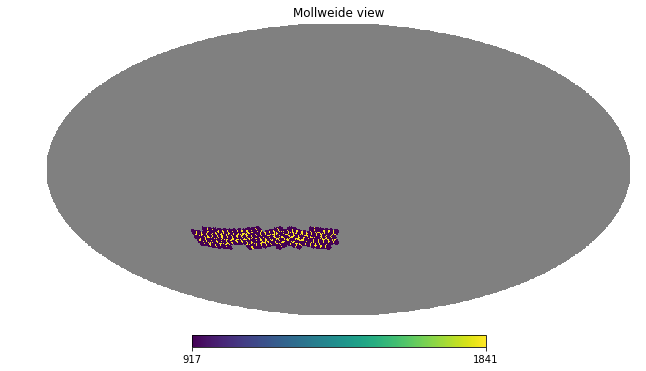

In [6]:
hp.mollview(bl[-1].metricValues)

In [4]:
dbFile = 'minion_1016_sqlite.db'
conn = db.OpsimDatabase(dbFile)
bl = survey_perf(conn, mjdCol='expMJD',latCol = 'ditheredDec', lonCol = 'ditheredRA',
                 expTimeCol='visitExpTime', degrees=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database Summary with no constraint for columns ['expMJD', 'visitExpTime'].
Found 2447931 visits
Running:  ['opsim_BruteOSFMetric_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database Summary with constraint ditheredDec > -0.698132 and ditheredDec < -0.523599 and ditheredRA > 0.000000 and ditheredRA < 1.745329 for columns ['ditheredRA', 'ditheredDec', 'airmass', 'expMJD']
Found 96451 visits
Running:  ['opsim_Median_airmass_ditheredDec_gt_-0_698132_and_ditheredDec_lt_-0_523599_and_ditheredRA_gt_0_000000_and_ditheredRA_lt_1_745329_UNIS']
Completed metric generation.
Running:  ['opsim_Count_expMJD_ditheredDec_gt_-0_698132_and_ditheredDec_lt_-0_523599_and_ditheredRA_gt_0_000000_and_ditheredRA_lt_1_745329_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Open Shutter Fraction=0.735663
Median airma

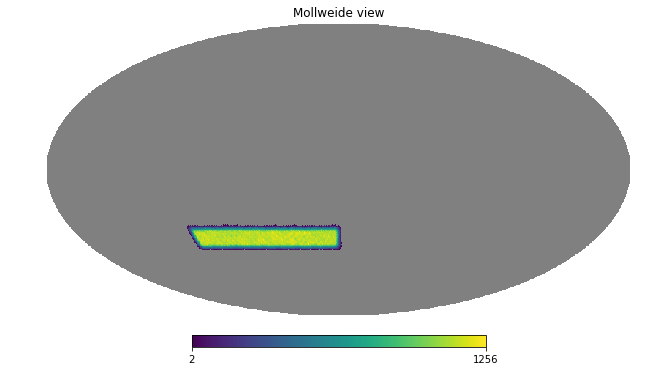

In [5]:
hp.mollview(bl[-1].metricValues)

In [7]:
dbFile = 'astro-lsst-01_2013.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
bl = survey_perf(conn, mjdCol='observationStartMJD',lonCol = 'fieldRA', latCol = 'fieldDec',
                 expTimeCol='visitExposureTime', degrees=True)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['visitExposureTime', 'observationStartMJD'].
Found 2364554 visits
Running:  ['opsim_BruteOSFMetric_UNIS']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint fieldDec > -40.000000 and fieldDec < -30.000000 and fieldRA > 0.000000 and fieldRA < 100.000000 for columns ['observationStartMJD', 'airmass', 'fieldDec', 'fieldRA']
Found 86449 visits
Running:  ['opsim_Median_airmass_fieldDec_gt_-40_000000_and_fieldDec_lt_-30_000000_and_fieldRA_gt_0_000000_and_fieldRA_lt_100_000000_UNIS']
Completed metric generation.
Running:  ['opsim_Count_observationStartMJD_fieldDec_gt_-40_000000_and_fieldDec_lt_-30_000000_and_fieldRA_gt_0_000000_and_fieldRA_lt_100_000000_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Open Shutter 

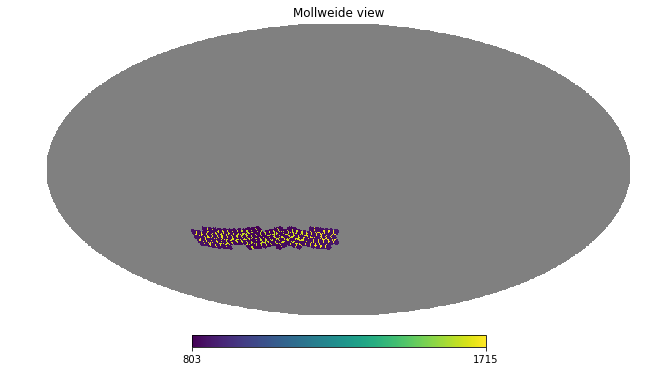

In [8]:
hp.mollview(bl[-1].metricValues)